In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [2]:
data=pd.read_csv("/content/Tweets.csv")

In [3]:
data.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


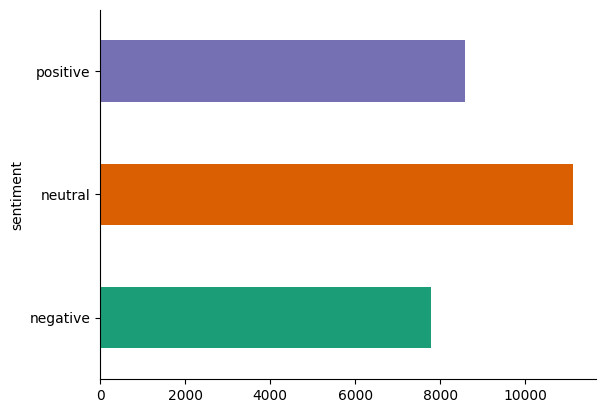

In [17]:
# @title sentiment

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('sentiment').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
data.isnull().sum()

textID           0
text             1
selected_text    1
sentiment        0
dtype: int64

In [5]:
data.dropna(subset=['text', 'sentiment'], inplace=True)


In [6]:
data.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [7]:

data.dropna(subset=['selected_text'], inplace=True)


In [8]:
data.isnull().sum()

textID           0
text             0
selected_text    0
sentiment        0
dtype: int64

In [9]:
data.drop(['textID'],axis=1)

,text,selected_text,sentiment
0,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,my boss is bullying me...,bullying me,negative
3,what interview! leave me alone,leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...
27476,wish we could come see u on Denver husband l...,d lost,negative
27477,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,But it was worth it ****.,But it was worth it ****.,positive


In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
def preprocess_text(text):
    if isinstance(text, str):
        # Remove special characters and digits
        text = re.sub(r'\W|\d', ' ', text)
        # Tokenize the text
        words = word_tokenize(text)
        # Convert words to lowercase
        words = [word.lower() for word in words]
        # Remove stopwords
        stop_words = set(stopwords.words('english'))
        words = [word for word in words if word not in stop_words]
        return ' '.join(words)
    else:
        return ''  # Return empty string for NaN values


In [12]:
data['text'] = data['text'].apply(preprocess_text)


feature extraction

In [13]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data['text'])
y = data['sentiment']


In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [15]:
from sklearn.naive_bayes import ComplementNB
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from math import *
cnb = ComplementNB()
cnb.fit(X_train, y_train)
cross_cnb = cross_val_score(cnb, X, y,n_jobs = -1)
print("Cross Validation score = ",cross_cnb)
print ("Train accuracy ={:.2f}%".format(cnb.score(X_train,y_train)*100))
print ("Test accuracy ={:.2f}%".format(cnb.score(X_test,y_test)*100))
train_acc_cnb=cnb.score(X_train,y_train)
test_acc_cnb=cnb.score(X_test,y_test)

Cross Validation score =  [0.62518195 0.63045852 0.63700873 0.6260917  0.62590975]
Train accuracy =84.19%
Test accuracy =62.23%


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Initialize Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB(alpha=0.5)  # Adjust alpha for regularization

# Perform cross-validation
cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5)

# Print cross-validation scores
print("Cross Validation scores =", cv_scores)

# Train the classifier on the entire training data
nb_classifier.fit(X_train, y_train)

# Predict the labels for training and testing data
y_train_pred = nb_classifier.predict(X_train)
y_test_pred = nb_classifier.predict(X_test)

# Calculate accuracy on training and testing data
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Print accuracies
print("Train accuracy = {:.2f}%".format(train_accuracy * 100))
print("Test accuracy = {:.2f}%".format(test_accuracy * 100))


Cross Validation scores = [0.6472595  0.62178758 0.63042984 0.63088469 0.63034577]
Train accuracy = 86.19%
Test accuracy = 62.65%
